In [1]:
from pathlib import Path
import vaex
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import animation

from scipy.optimize import minimize, curve_fit

from scipy import interpolate

import illustris_python as il

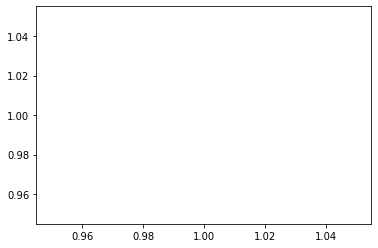

In [2]:
%matplotlib inline


plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.show()

In [3]:
path = "/net/virgo01/data/users/spirov/Nexus Project/"

fields = ['SubhaloMass',] 
dm = il.snapshot.loadSubset(path,135,"dm")

In [4]:
dm.keys()

dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'Velocities'])

In [5]:
gc = il.groupcat.load(path,135)

In [6]:
gc['subhalos']

{'count': 111992,
 'SubhaloCM': array([[  859.5513 , 26338.482  , 18048.184  ],
        [  162.37321, 24548.322  , 16857.793  ],
        [  852.48114, 26705.969  , 17456.746  ],
        ...,
        [66115.086  , 43317.7    , 12659.727  ],
        [61622.332  , 66599.87   , 32447.31   ],
        [65678.125  , 47361.094  , 15991.144  ]], dtype=float32),
 'SubhaloGrNr': array([    0,     0,     0, ..., 94025, 94026, 94027], dtype=uint32),
 'SubhaloHalfmassRad': array([654.0915  , 282.46603 ,  99.55431 , ...,  23.177147,  24.49217 ,
         14.634248], dtype=float32),
 'SubhaloHalfmassRadType': array([[  0.      , 654.0915  ,   0.      ,   0.      ,   0.      ,
           0.      ],
        [  0.      , 282.46603 ,   0.      ,   0.      ,   0.      ,
           0.      ],
        [  0.      ,  99.55431 ,   0.      ,   0.      ,   0.      ,
           0.      ],
        ...,
        [  0.      ,  23.177147,   0.      ,   0.      ,   0.      ,
           0.      ],
        [  0.      ,  24

In [7]:
gc['header']

{'BoxSize': 75000.0,
 'FileOffsets_Group': array([    0, 47014]),
 'FileOffsets_Snap': array([[       0,        0,        0,        0,        0,        0,
                0,        0],
        [       0, 11740586, 23545119, 35279786, 47084340, 58883971,
         70659912, 82435678],
        [       0,        0,        0,        0,        0,        0,
                0,        0],
        [       0,        0,        0,        0,        0,        0,
                0,        0],
        [       0,        0,        0,        0,        0,        0,
                0,        0],
        [       0,        0,        0,        0,        0,        0,
                0,        0]]),
 'FileOffsets_SubLink': array([      0,  214832,  339962,  494162,  670264,  864904, 1076101,
        1281171, 1482459, 1695429, 1905327, 2119223, 2333667, 2546141,
        2759046, 2973651, 3187427, 3401832, 3616050, 3830875, 4045444,
        4260139, 4474872, 4689502, 4904327, 5119091, 5333840, 5548640,
        576

# Simple Plots of Particles

In [8]:
dm_pos = dm["Coordinates"]

In [9]:
ids = dm["ParticleIDs"]

In [10]:
Xs = dm_pos[:,0]
Ys = dm_pos[:,1]
Zs = dm_pos[:,2]
Vx = dm["Velocities"][:,0]
Vy = dm["Velocities"][:,1]
Vz = dm["Velocities"][:,2]


df = vaex.from_arrays(ID = ids, X=Xs,Y=Ys,Z=Zs,Vx=Vx,Vy=Vy,Vz=Vz)

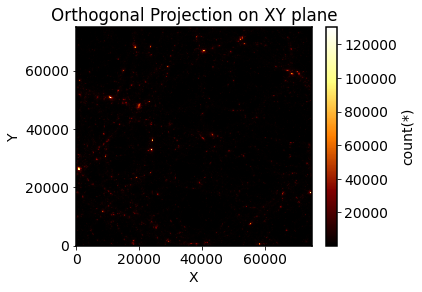

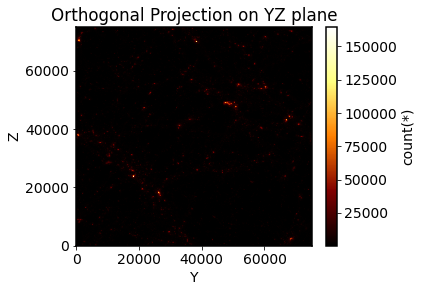

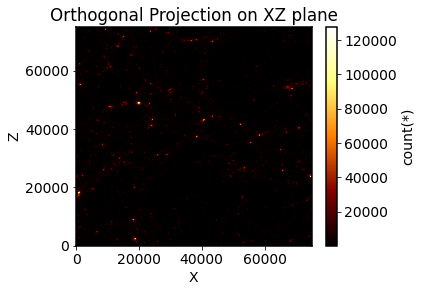

In [11]:
df.viz.heatmap("X","Y")
plt.title("Orthogonal Projection on XY plane")
plt.show()

df.viz.heatmap("Y","Z")
plt.title("Orthogonal Projection on YZ plane")
plt.show()


df.viz.heatmap("X","Z")
plt.title("Orthogonal Projection on XZ plane")
plt.show()

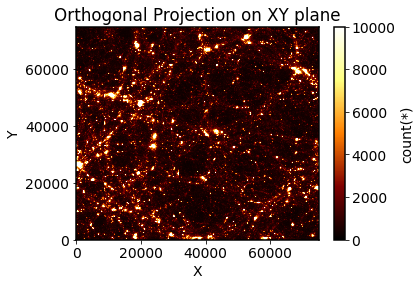

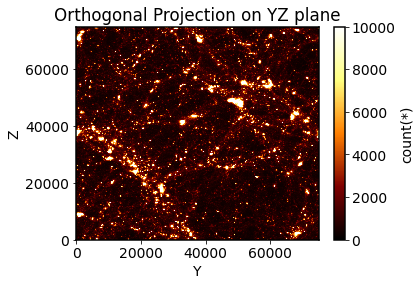

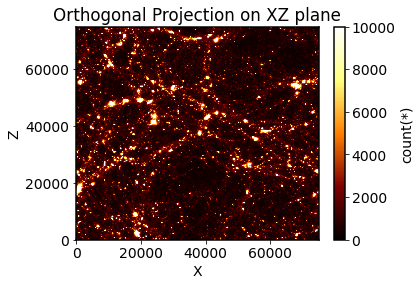

In [12]:
df.viz.heatmap("X","Y",vmin=0,vmax=10000)
plt.title("Orthogonal Projection on XY plane")
plt.show()

df.viz.heatmap("Y","Z",vmin=0,vmax=10000)
plt.title("Orthogonal Projection on YZ plane")
plt.show()


df.viz.heatmap("X","Z",vmin=0,vmax=10000)
plt.title("Orthogonal Projection on XZ plane")
plt.show()

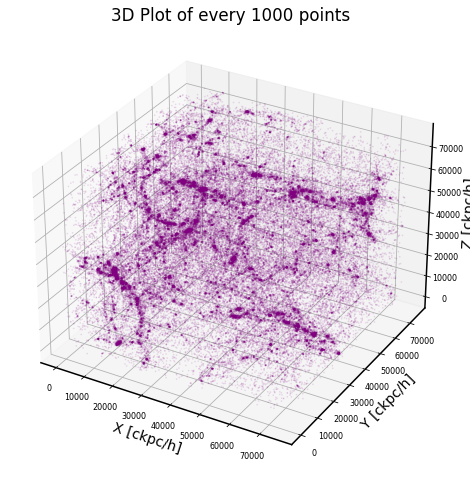

In [13]:
n = 1000


fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(projection='3d')


ax.scatter(Xs[::n],Ys[::n],Zs[::n],s=0.5,alpha = .1,c='purple')
ax.set_title(f"3D Plot of every {n} points")
ax.set_xlabel(f"X [ckpc/h]")
ax.set_ylabel(f"Y [ckpc/h]")
ax.set_zlabel(f"Z [ckpc/h]")

ax.tick_params(axis='both', which='major', labelsize=8)


plt.show()



In [14]:
subHaloPoses = gc['subhalos']['SubhaloCM']
subHaloHalfRads = gc['subhalos']["SubhaloHalfmassRad"]


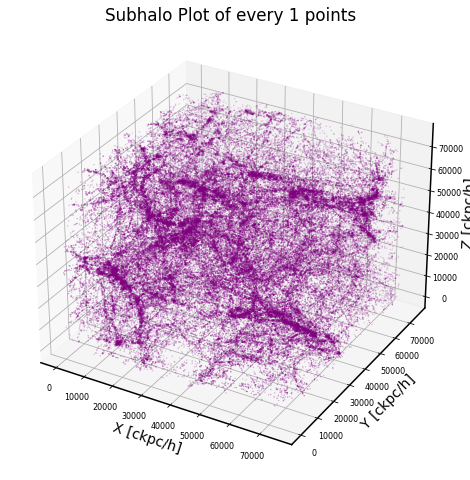

In [15]:
sn = 1

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(projection='3d')

shScale = subHaloHalfRads[::sn]/np.max(subHaloHalfRads) * 1


ax.scatter(subHaloPoses[::sn][:,0],subHaloPoses[::sn][:,1],subHaloPoses[::sn][:,2],s=shScale,c='purple')
ax.set_title(f"Subhalo Plot of every {sn} points")
ax.set_xlabel(f"X [ckpc/h]")
ax.set_ylabel(f"Y [ckpc/h]")
ax.set_zlabel(f"Z [ckpc/h]")

ax.tick_params(axis='both', which='major', labelsize=8)


plt.show()



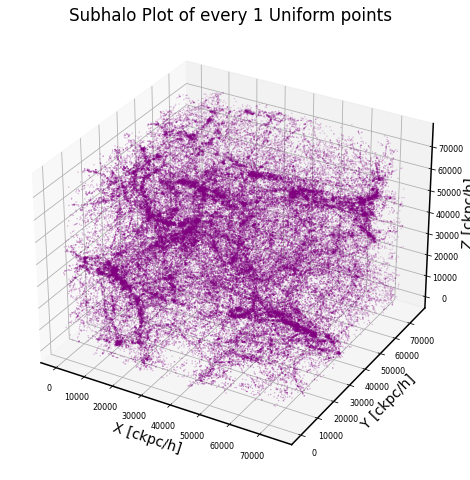

In [16]:
sn = 1

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(projection='3d')


ax.scatter(subHaloPoses[::sn][:,0],subHaloPoses[::sn][:,1],subHaloPoses[::sn][:,2],s=np.mean(shScale),c='purple')
ax.set_title(f"Subhalo Plot of every {sn} Uniform points")
ax.set_xlabel(f"X [ckpc/h]")
ax.set_ylabel(f"Y [ckpc/h]")
ax.set_zlabel(f"Z [ckpc/h]")

ax.tick_params(axis='both', which='major', labelsize=8)


plt.show()



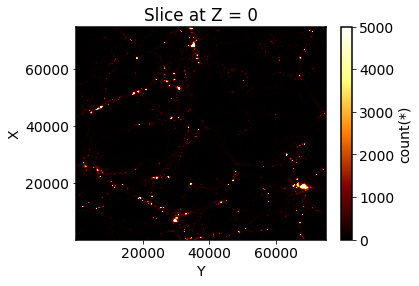

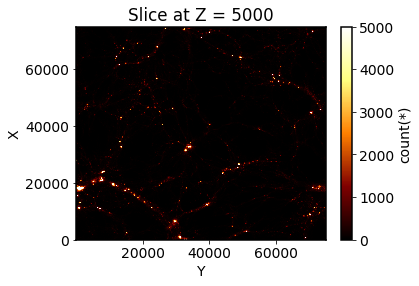

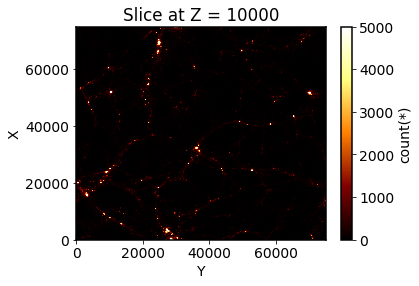

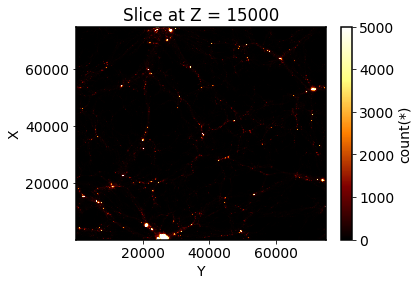

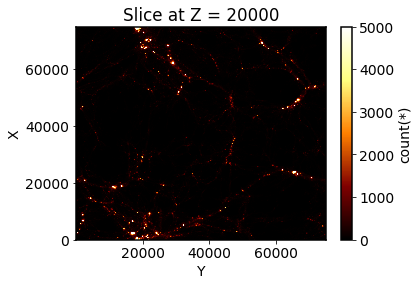

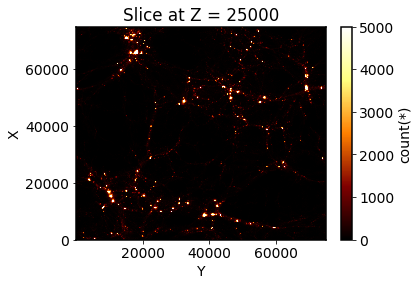

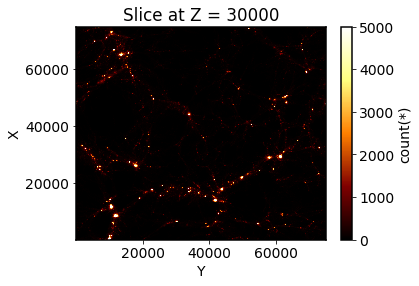

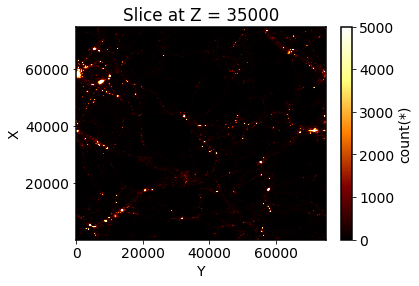

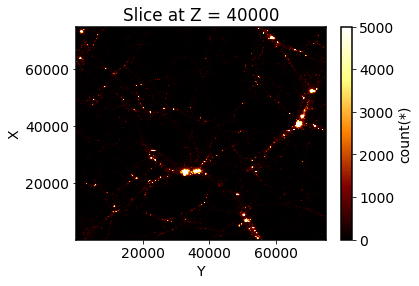

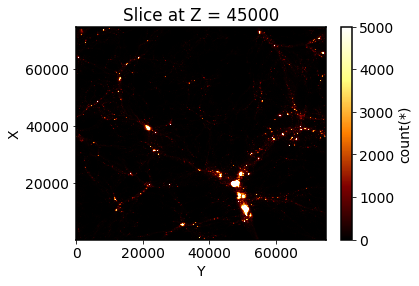

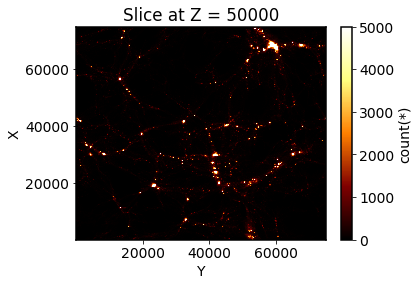

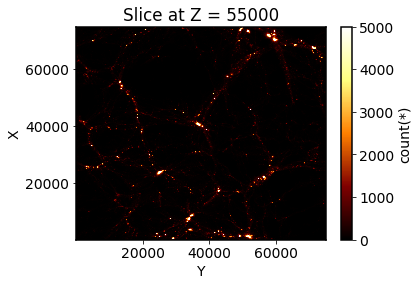

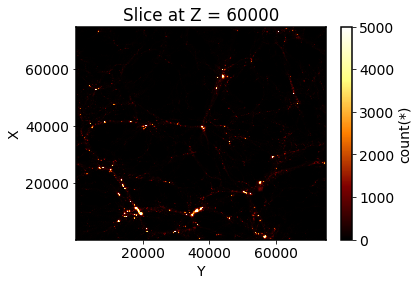

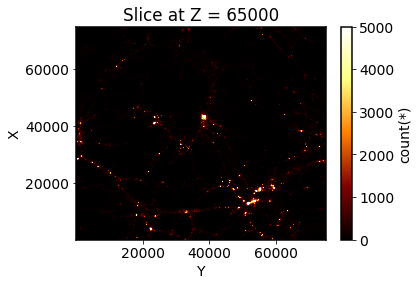

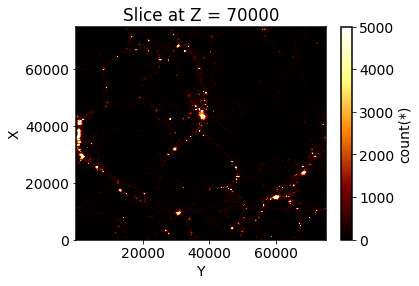

In [17]:
for i in range(round(75/5)):
    
    
    filt = (df.Z>i*5000)*(df.Z<(i+1)*5000)
    mf = df[filt]
        
    mf.viz.heatmap("Y","X",vmax=5000,vmin=0)
    plt.title(f"Slice at Z = {i*5000}")
    plt.show()
    
    

In [18]:

fig = plt.figure(figsize=(8,8))

ims = []

plt.set_cmap("plasma") 


N = 150


for i in range(N):
    break
    print(i)
    
    d = 75000/N
    
    filt = (df.Z>i*d)*(df.Z<(i+1)*d)
    mf = df[filt]
    
    sub = fig.subfigures(1)
    axMos = sub.subplot_mosaic("""
                           .......
                           .AAAAA.
                           .AAAAA.
                           .AAAAA.
                           .......
                           """)
    
    
    ax = axMos['A']
    mf.viz.heatmap("Y","X",vmin=0,vmax = 1000)
    ax.set_title(f"Slice at Z = {i*d}")
    #plt.show()
    
    ims.append([sub])
       
ani = animation.ArtistAnimation(fig, ims, interval=100)
ani.save("animProj1.mp4")




<Figure size 576x576 with 0 Axes>

In [19]:
@vaex.register_function()
def correct(x):
    L = 75000
    return np.where(np.abs(x)>L/2, x-np.sign(x)*L,x)

def localizeDataFrame(absDf, x,y,z):
    rx = absDf.X - x
    ry = absDf.Y - y
    rz = absDf.Z - z
    
    L = 75000
    
    
    relx = rx.correct()
    rely = ry.correct()
    relz = rz.correct()
    
    
    relR = np.sqrt(relx**2 + rely**2+relz**2)
    #smolr = np.sqrt(relx**2 + rely**2)
    
    theta = np.arccos(-relz/relR)
    fi = np.arctan2(relx,rely)
    
    relDf = absDf.copy()
    
    Vaway = (relx*absDf.Vx+rely*absDf.Vy+relz*absDf.Vz)/relR
    
    #print(relx)
   # print(fi)
    
    relDf["relx"] = relx
    #relDf["rely"] = rely
    
    relDf["R"] = relR
    relDf["Th"] = theta
    relDf["Fi"] = fi
    relDf["Vr"] = Vaway
    
    
    
    
    return relDf
    
    
    

In [20]:
df.X.correct().max()

array(37500.)

In [21]:
cent = 37500

rdf = localizeDataFrame(df, 20000,47500,67500)
cdf = localizeDataFrame(df, cent,cent,cent)

In [22]:
rdf


#           ID        X          Y          Z          Vx         Vy          Vz          relx              R                   Th                  Fi                   Vr
0           88038007  860.2786   26320.94   18281.758  37.119167  -126.95646  -137.56683  -19139.720703125  38465.31619711755   2.3053552275779965  -2.4067318157870217  -40.773010642635306
1           88173007  862.8968   26320.16   18283.193  -62.20938  -280.38562  -148.18048  -19137.103515625  38465.40532194566   2.3054034245439943  -2.4068181448977315  86.01141399920735
2           3638407   859.6459   26324.168  18280.25   79.16669   -229.4381   -60.910133  -19140.353515625  38462.842913405555  2.3053604801399636  -2.4066395318752702  46.09606537873698
3           3439732   861.843    26322.36   18286.85   -63.35342  -266.66763  -153.27612  -19138.15625      38467.16911689224   2.3054900937824154  -2.4067391262708036  75.58005145898882
4           81301332  860.39545  26319.984  18284.232  187.94035  -223.2462   -114.28199  -19139.60546875   38467.44338996184   2.305391967997595   -2.4067572428285633  -47.19366385251416
...         ...       ...        ...        ...        ...        ...         ...         ...               ...                 ...                 ...                  ...
94,196,370  94196367  59066.92   45572.824  27697.115  -60.46998  14.100099   -88.42843   -35933.078125     50336.239736903895  2.3451302471009328  -1.6243773521001235  -19.2053778977727
94,196,371  94196368  63540.31   51048.69   47286.035  195.7977   257.62384   118.035645  -31459.69140625   37562.078866559474  1.0025578402666175  -1.4584699241854842  -203.16969344371944
94,196,372  94196369  60536.855  49059.383  56893.633  88.98358   148.74493   -175.3597   -34463.14453125   36092.03555708411   1.2725232026296365  -1.5255793296379563  -27.008020003767534
94,196,373  94196373  65776.43   61606.74   46854.918  242.84515  16.739655   113.39123   -29223.5703125    38460.844229194416  1.004178133822668   -1.1210697998023464  -239.2467426081695
94,196,374  94196375  64010.445  61434.027  70.096725  174.96793  17.906925   -8.918241   -30989.5546875    34811.14738383101   1.7900096668158834  -1.148244931674304   -150.53150683336366

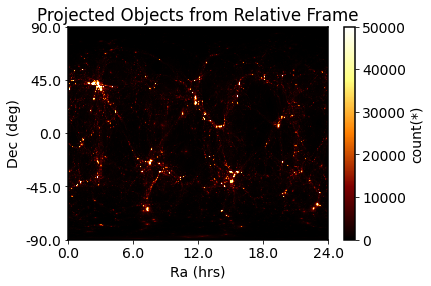

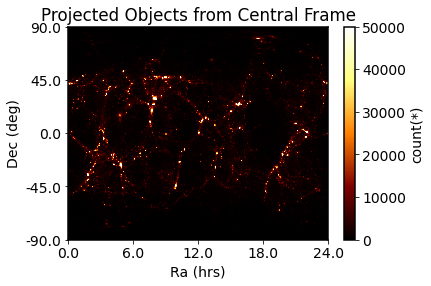

In [23]:
def projectSky(df,name="Relative Frame"):
    df.viz.heatmap("Fi","Th",vmin=0,vmax=50000)
    plt.xlabel("Ra (hrs)")
    plt.ylabel("Dec (deg)")
    plt.yticks(np.linspace(0,np.pi,5), np.linspace(-90,90,5))
    plt.xticks(np.linspace(-np.pi,np.pi,5), np.linspace(0,24,5))
    plt.title(f"Projected Objects from {name}")
    plt.show()
    
projectSky(rdf)

projectSky(cdf,"Central Frame")

In [24]:
def positionPlot(df,tolAng = np.pi/4,name="Relative Plot",dist=False):
    
    filt = (df.Th>tolAng)*(df.Th<(np.pi-tolAng))
    
    df = df[filt]
    
    r = df.R.values
    phi = df.Fi.values
    vr = df.Vr.values
    
    fig = plt.figure(figsize=(24,16))
    ax = fig.add_subplot(projection='polar')
    
    if dist:
        sc = ax.scatter(phi, r,alpha=0.01,s=0.01,c=vr,cmap="plasma",vmin=-500,vmax=500)
        cb = fig.colorbar(sc)
        cb.set_label("Radial Velocity")
        cb.solids.set(alpha=1)
    else:
        ax.scatter(phi, r,alpha=0.01,s=0.01,color='indigo')
    
    ax.set_rlabel_position(0)  # Move radial labels away from plotted line

    ax.set_title(f"Distance Plot from {name}")
    plt.show()
    


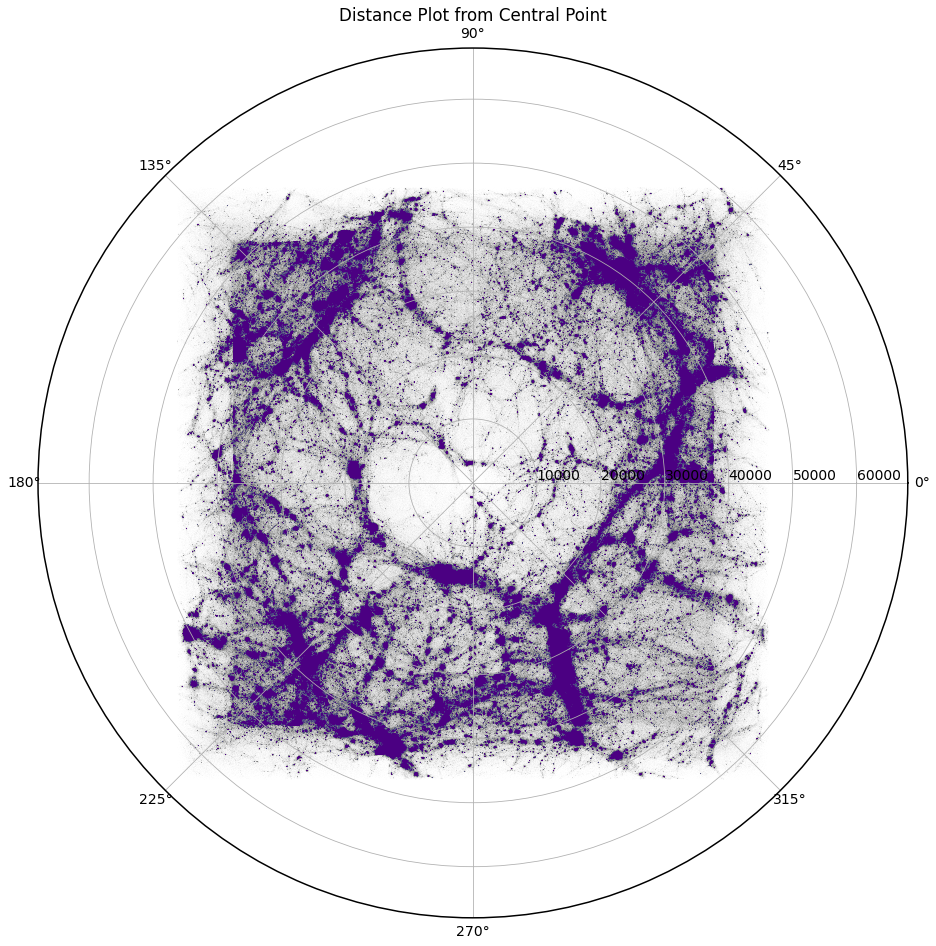

In [25]:
positionPlot(cdf,np.pi*0.3,"Central Point")

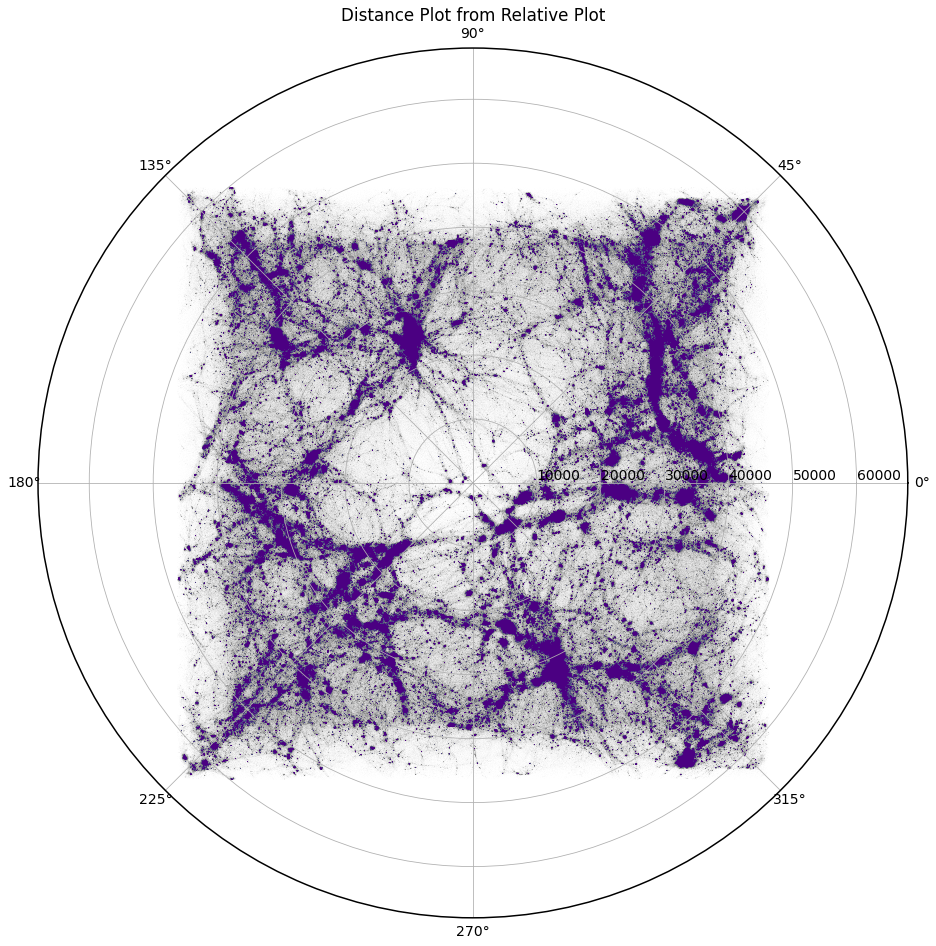

In [26]:
positionPlot(rdf,np.pi*0.3)

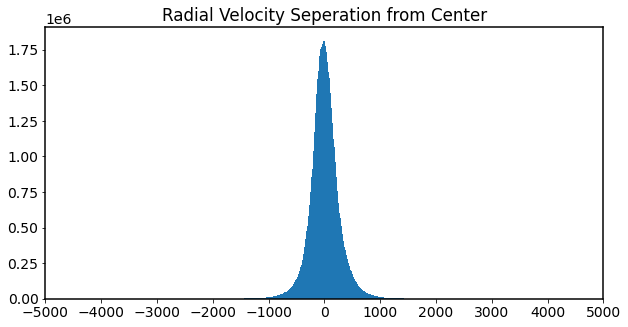

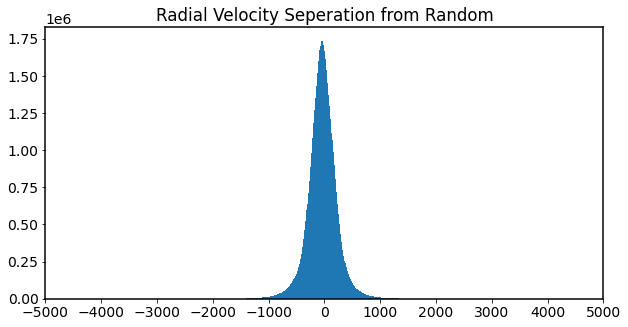

In [27]:
vrs = cdf.Vr.values
plt.figure(figsize=(10,5))
plt.hist(vrs,500)
plt.xticks(np.linspace(-5000,5000,11))
plt.title("Radial Velocity Seperation from Center")
plt.show()
vrs = rdf.Vr.values
plt.figure(figsize=(10,5))
plt.hist(vrs,500)
plt.xticks(np.linspace(-5000,5000,11))
plt.title("Radial Velocity Seperation from Random")
plt.show()

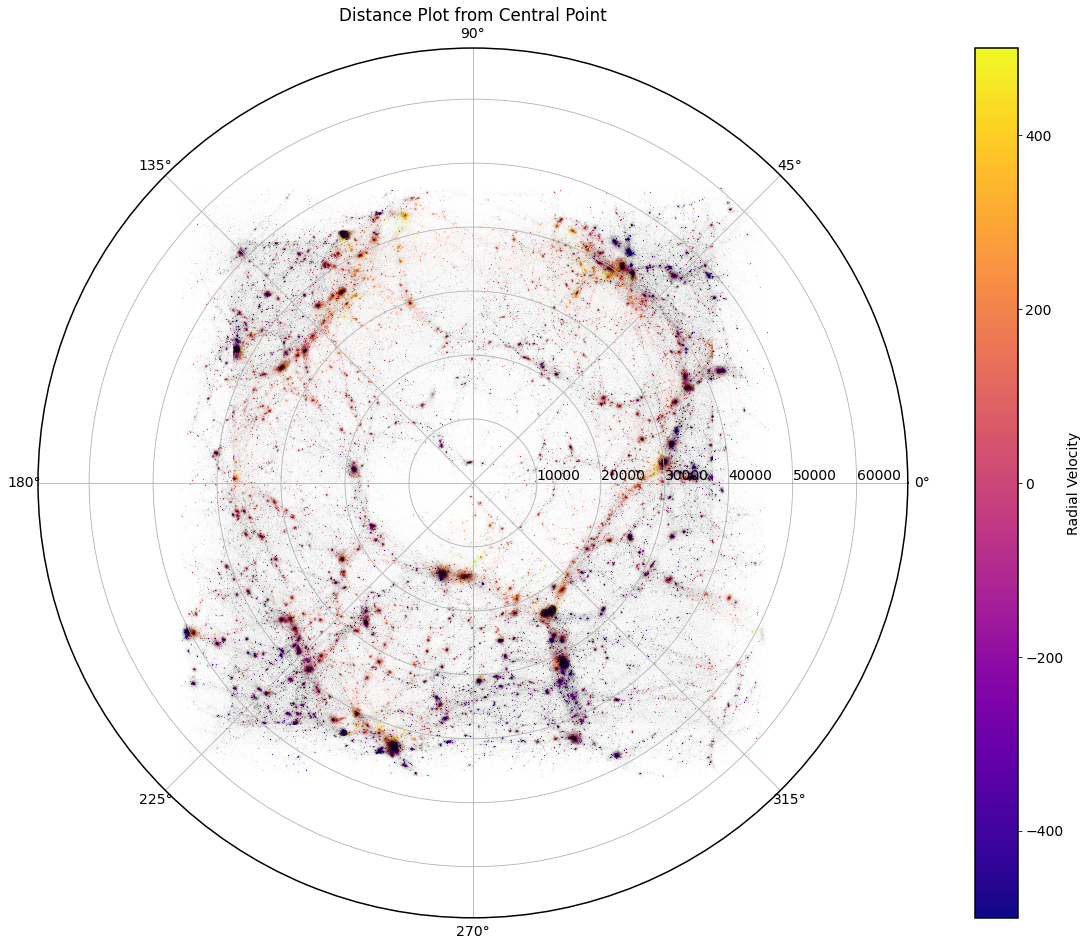

In [28]:
positionPlot(cdf,np.pi*0.3,"Central Point",True)

In [29]:
def czPlot(df,tolAng = np.pi/4,name="Relative Plot"):
    
    filt = (df.Th>tolAng)*(df.Th<(np.pi-tolAng))
    
    df = df[filt]
    
    r = df.R.values
    phi = df.Fi.values
    vr = df.Vr.values
    
    fig = plt.figure(figsize=(24,16))
    ax = fig.add_subplot(projection='polar')
    
    rh= r/ 10
    
    cz = rh + vr
    
    ax.scatter(phi, cz,alpha=0.01,s=0.01,color='indigo')
    
    ax.set_rlabel_position(0)  # Move radial labels away from plotted line

    ax.set_title(f"cz Plot from {name}")
    plt.show()
    


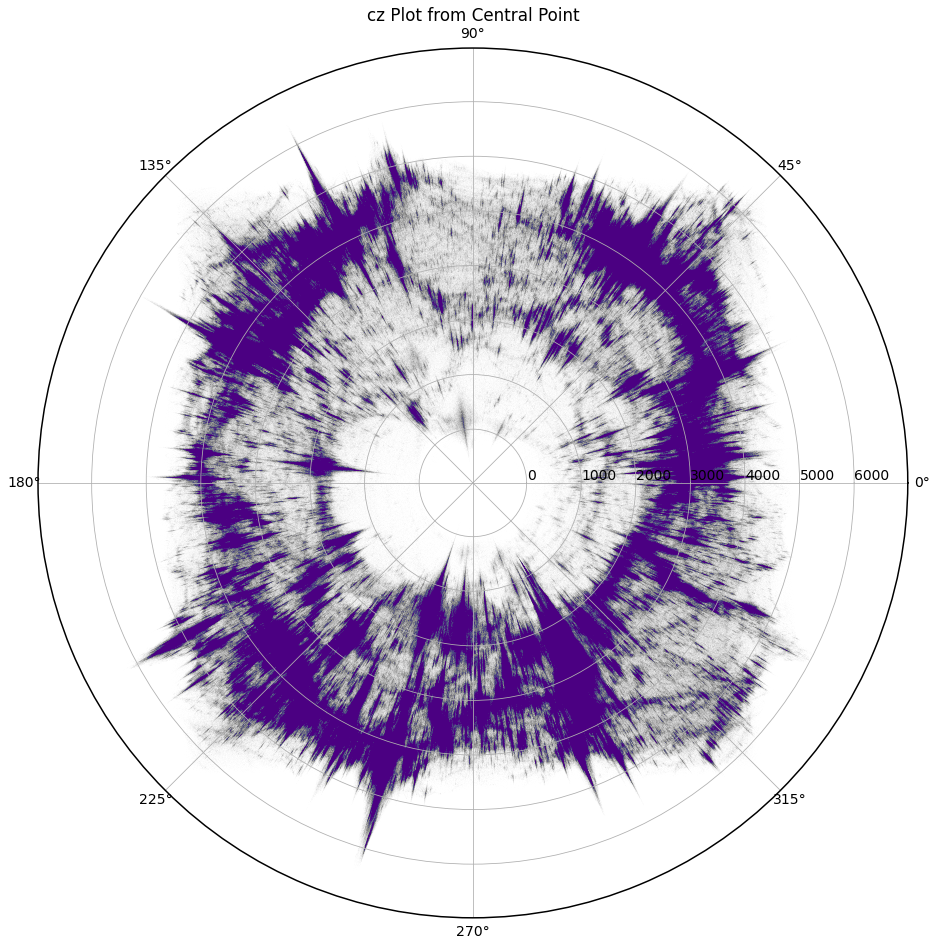

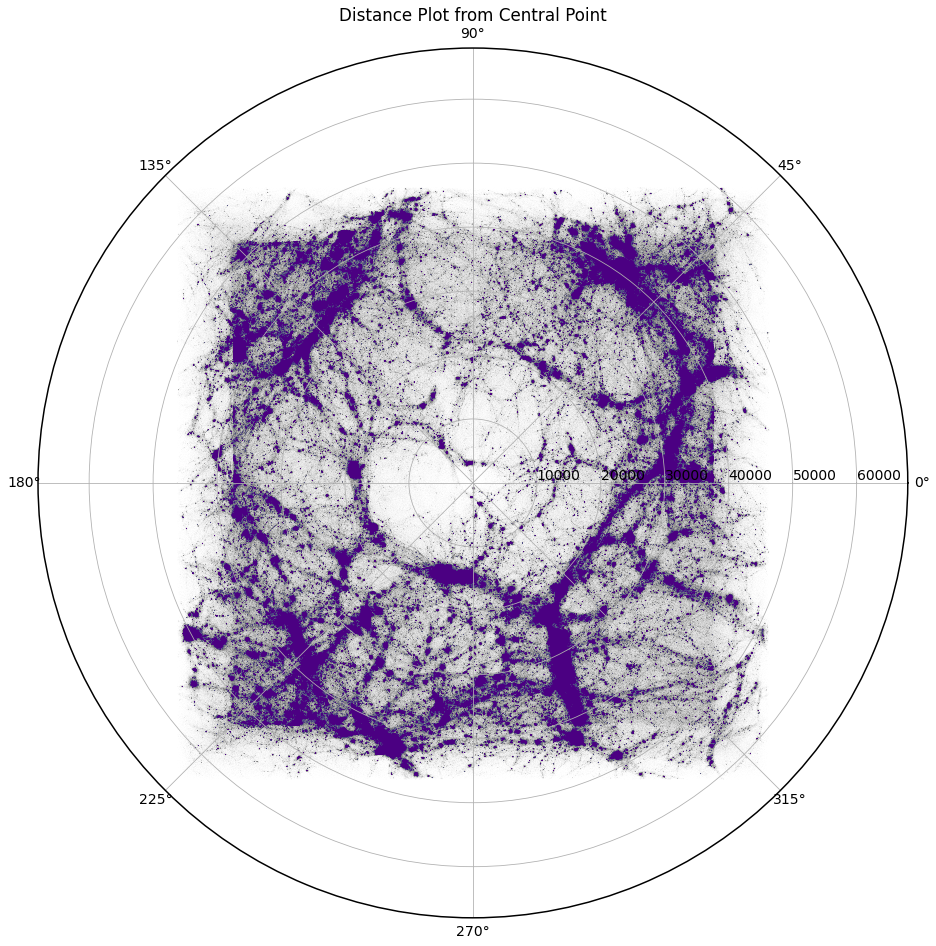

In [30]:
czPlot(cdf,np.pi*0.3,"Central Point")
positionPlot(cdf,np.pi*0.3,"Central Point")

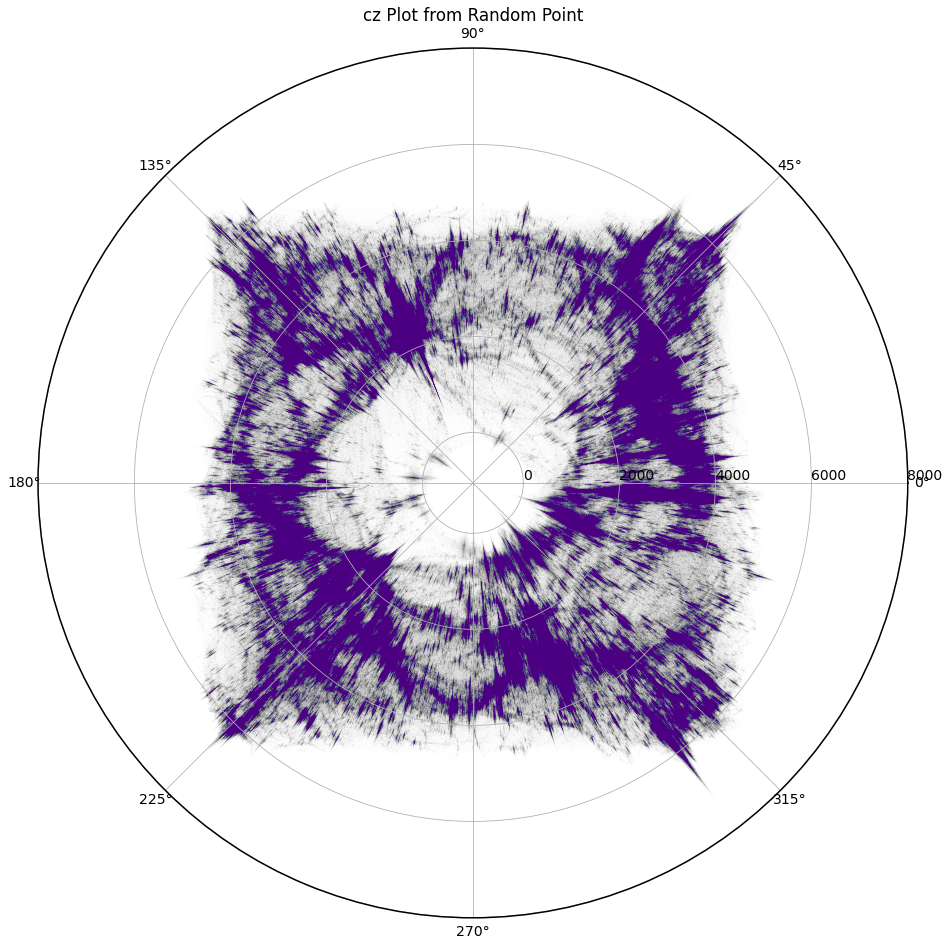

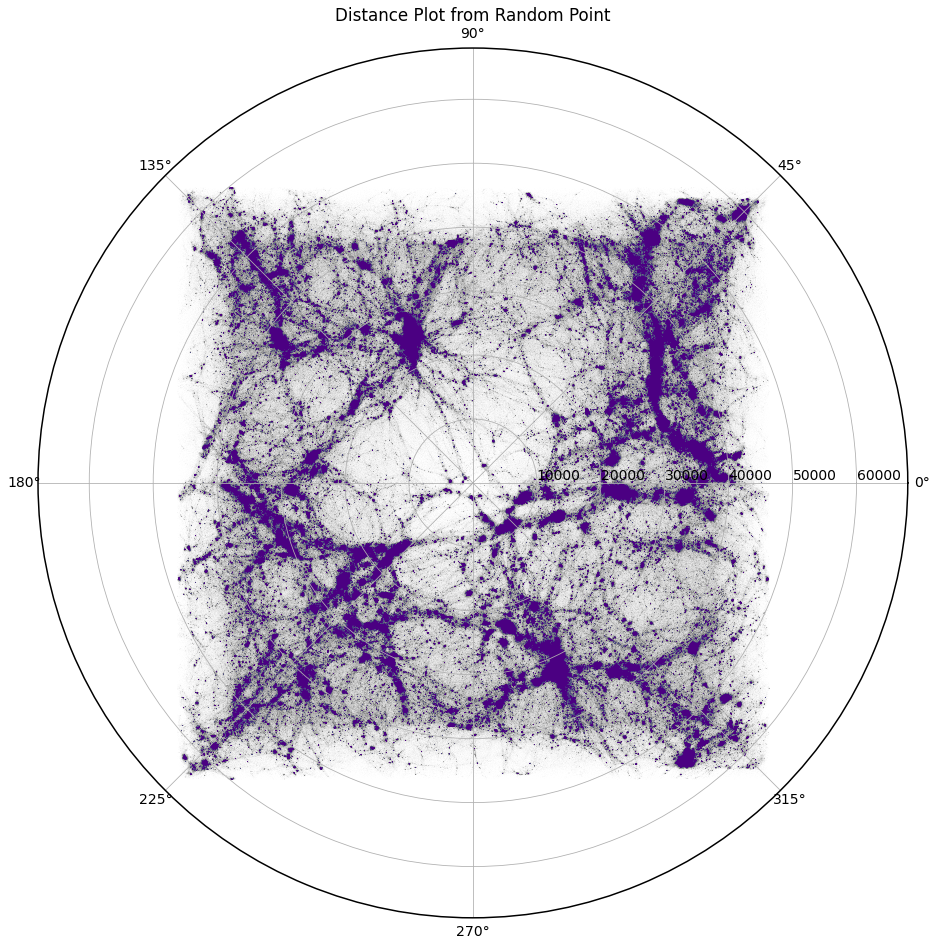

In [31]:
czPlot(rdf,np.pi*0.3,"Random Point")
positionPlot(rdf,np.pi*0.3,"Random Point")

> further

zoom in on large structs and see how they look in redshift space

then do ML

In [ ]:
N=1000
smolDf = vaex.from_arrays(ID = ids[::N], X=Xs[::N],Y=Ys[::N],Z=Zs[::N],Vx=Vx[::N],Vy=Vy[::N],Vz=Vz[::N])

In [ ]:
smolDf.export_hdf5(path+"baby_135.hdf5")